# Question 2: Archive API Collection and Storage

In [1]:
import requests,json,os
import re,datetime
import shutil
import matplotlib.pyplot as mp

In [2]:
nyt_article_search_key = os.getenv('auth_key')
print(nyt_article_search_key)

64c3ab93117a4311b15dd35ecb7cff3d


In [3]:
dir_path='Archive'
os.makedirs(dir_path,exist_ok=True)

In [ ]:
for y in range(2012,2017):
    for m in range(1,13):
        
        
        art_url=('http://api.nytimes.com/svc/archive/v1/'+str(y)+'/'+str(m)+'.json?api-key='+ nyt_article_search_key)
        get_request=requests.get(art_url)
        article=json.loads(get_request.text)
        for i in range(0,5000):
            try:
                
                t=article['response']['docs'][i]['pub_date']
                match = re.search(r'\d{4}-\d{2}-\d{2}', t)
                date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
    
                year_path = os.path.join(dir_path, str(date.year))   
                os.makedirs(year_path,exist_ok=True)
                month_path = os.path.join(year_path, date.strftime("%b"))
                os.makedirs(month_path, exist_ok=True)
            except IndexError:
                pass                                                  
            with open(article['response']['docs'][i]['_id'],'w')as outfile:
                json.dump(article['response']['docs'][i],outfile)
        
        for files in os.listdir('./'):
            if files.endswith('.ipynb'):
                print(date.year,date.strftime("%b"))                                                      
            else:
                
                try:
                    shutil.move(os.path.join('./',files),os.path.join(month_path,files+'.json'))
                except OSError:
                    pass

# Question 2: Analysis 1 on Archive API

In [4]:
Total=dict.fromkeys(range(2012,2017),0)
Obama_care=dict.fromkeys(range(2012,2017),0)
Iraq_war=dict.fromkeys(range(2012,2017),0)
Osama_assassination=dict.fromkeys(range(2012,2017),0)
Terrorism_counterterror=dict.fromkeys(range(2012,2017),0)
global_warming=dict.fromkeys(range(2012,2017),0)
for folder in range(2012,2017):
        jpath ='Archive/'+str(folder)
        
        for root, dirs, files in os.walk(jpath):
        
            for f in files:
                if f.endswith('.json'):
    
                    with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
         
                        artdata=json.load(json_file)
                   
                        match = re.search(r'\d{4}-\d{2}-\d{2}', artdata['pub_date'])
                        date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
                    
                    try:
                        if 'obama' in artdata['lead_paragraph'].lower():
                            if ('president' or 'barack') in artdata['lead_paragraph'].lower():
                                Total[date.year]+=1
                                if ('health care' or 'obama care') in artdata['lead_paragraph'].lower():
                                    Obama_care[date.year]+=1
                                    
                                if ('war' and 'iraq') in artdata['lead_paragraph'].lower():
                                    Iraq_war[date.year]+=1
                                    
                                if ('global warming') in artdata['lead_paragraph'].lower():
                                    global_warming[date.year]+=1
                                    
                                if ('osama bin laden' and ("killed" or "seal team six")) in artdata['lead_paragraph'].lower():
                                    Osama_assassination[date.year]+=1
                                    
                                if ('terrorism') in artdata['lead_paragraph'].lower():
                                    Terrorism_counterterror[date.year]+=1
                                    
                                    
                    except (TypeError,AttributeError):
                        pass

In [5]:
x=[]
Tot=[]
Ob_car=[]
I_war=[]
O_assas=[]
T_count=[]
g_warm=[]
for a in sorted(Total):
    x.append(a)
    Tot.append(Total[a])
for a in sorted(Obama_care):
    Ob_car.append(Obama_care[a])
for a in sorted(Iraq_war):
    I_war.append(Iraq_war[a])
for a in sorted(Osama_assassination):
    O_assas.append(Osama_assassination[a])
for a in sorted(Terrorism_counterterror):
    T_count.append(Terrorism_counterterror[a])
for a in sorted(global_warming):
    g_warm.append(global_warming[a])

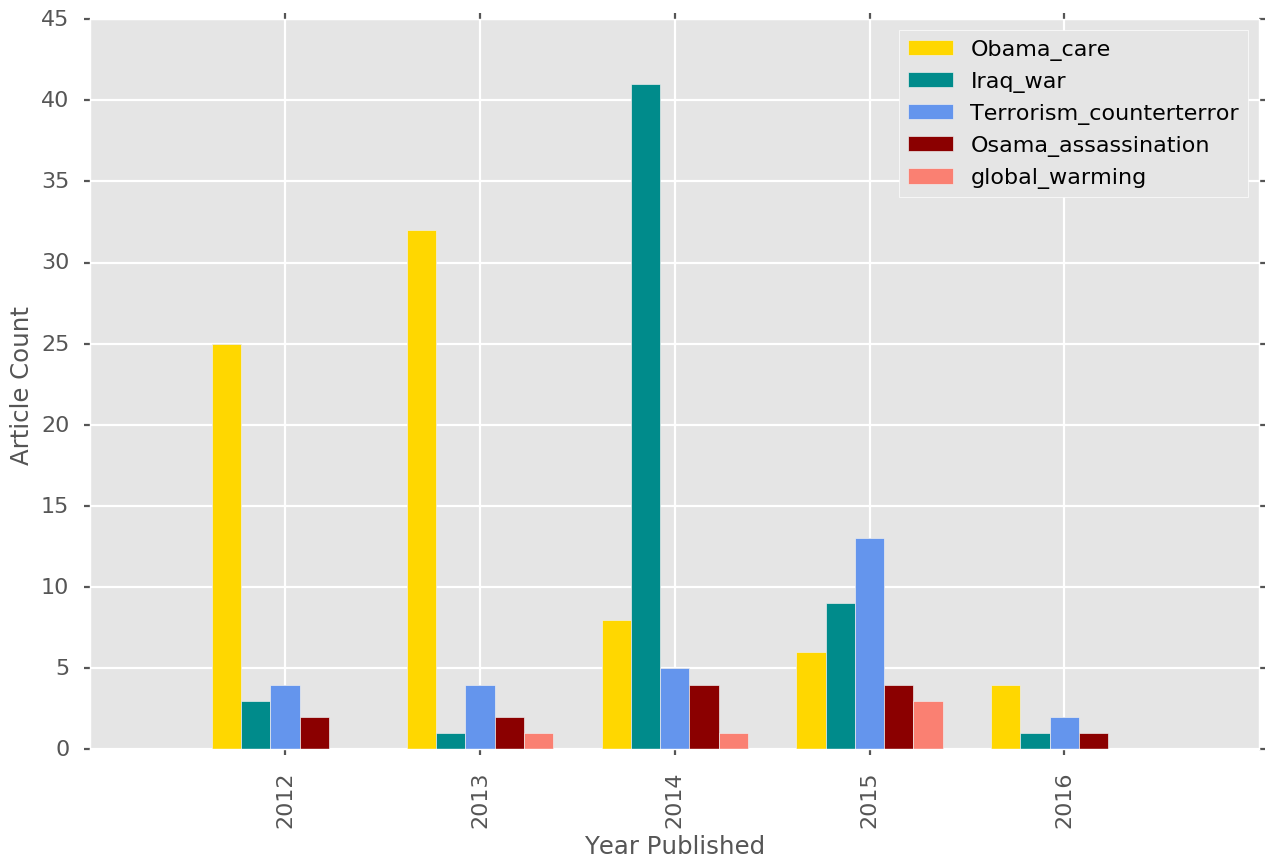

In [6]:
mp.style.use('ggplot')
mp.style.use('seaborn-dark-palette')
mp.style.use('seaborn-poster')

pos=[0.15]*5
z = mp.subplot(111)

#z.bar([i - (j*4) for i, j in zip(x, pos)], Tot,width=0.1,color='b',align='center')

z.bar([i - (j*2) for i, j in zip(x, pos)], Ob_car,width=0.15,color='gold',align='center',label='Obama_care')

z.bar([i - (j) for i, j in zip(x, pos)], I_war,width=0.15,color='darkcyan',align='center',label='Iraq_war')

z.bar(x, T_count,width=0.15,color='cornflowerblue',align='center',label='Terrorism_counterterror')

z.bar([i + (j) for i, j in zip(x, pos)], O_assas,width=0.15,color='darkred',align='center',label='Osama_assassination')

z.bar([i + (j*2) for i, j in zip(x, pos)], g_warm,width=0.15,color='salmon',align='center',label='global_warming')

mp.xticks(x,x,rotation='vertical')
z.legend()

mp.ylabel('Article Count')
mp.xlabel('Year Published')
mp.tight_layout()
mp.show()